In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./modal-share-world.tsv', sep='\t')
df.head()

,Metro area,walking,cycling,public transport,private motor vehicle,year,Survey Area
0,Australia Adelaide,3%,1%,11%,85%,2016,GCCSA
1,United States Atlanta,1%,0%,3%,86%,2016,UA
2,Greece Athens,8%,2%,37%,53%,2006,NaN
3,New Zealand Auckland,5%,1%,12%,81%,2018,MUA
4,United States Austin,2%,1%,3%,83%,2019,NaN


In [3]:
df = df.drop(['Survey Area'], axis=1)
df[df.isnull().any(axis=1)]

,Metro area,walking,cycling,public transport,private motor vehicle,year
64,South Korea Seoul,NaN,4%,66%,23%,2014
67,Bulgaria Sofia,NaN,NaN,73%,27%,2010


In [4]:
clean_df = df.dropna(axis=0)
for i, col in enumerate(clean_df):
    if i in [1, 2, 3, 4]:
        clean_df[col] = clean_df[col].str.strip('%').astype(float)
clean_df.head()

C:\Users\justi\AppData\Local\Temp\ipykernel_20344\1141372871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = clean_df[col].str.strip('%').astype(float)


,Metro area,walking,cycling,public transport,private motor vehicle,year
0,Australia Adelaide,3.0,1.0,11.0,85.0,2016
1,United States Atlanta,1.0,0.0,3.0,86.0,2016
2,Greece Athens,8.0,2.0,37.0,53.0,2006
3,New Zealand Auckland,5.0,1.0,12.0,81.0,2018
4,United States Austin,2.0,1.0,3.0,83.0,2019


In [5]:
# normalizing if total is >100
norm_df = clean_df.iloc[:, 1:5]
norm_df.head()

,walking,cycling,public transport,private motor vehicle
0,3.0,1.0,11.0,85.0
1,1.0,0.0,3.0,86.0
2,8.0,2.0,37.0,53.0
3,5.0,1.0,12.0,81.0
4,2.0,1.0,3.0,83.0


In [6]:
clean_df['need_norm'] = np.where(clean_df['walking'] + clean_df['cycling'] + clean_df['public transport'] + clean_df['private motor vehicle'] > 100, True, False)
clean_df.head(20)

C:\Users\justi\AppData\Local\Temp\ipykernel_20344\3160458269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['need_norm'] = np.where(clean_df['walking'] + clean_df['cycling'] + clean_df['public transport'] + clean_df['private motor vehicle'] > 100, True, False)


,Metro area,walking,cycling,public transport,private motor vehicle,year,need_norm
0,Australia Adelaide,3.00,1.00,11.00,85.00,2016,False
1,United States Atlanta,1.00,0.00,3.00,86.00,2016,False
2,Greece Athens,8.00,2.00,37.00,53.00,2006,False
3,New Zealand Auckland,5.00,1.00,12.00,81.00,2018,False
4,United States Austin,2.00,1.00,3.00,83.00,2019,False
5,United States Baltimore,3.00,0.00,7.00,84.00,2016,False
6,Spain Barcelona,34.35,2.28,37.33,26.04,2018,False
7,China Beijing,21.00,32.00,26.00,21.00,2005/2011,False
8,Serbia Belgrade,23.00,1.00,49.00,27.00,2015,False
9,Germany Berlin,30.00,18.00,27.00,26.00,2018,True


In [7]:
# Find rows that need normalization (total > 100)
norm_df = clean_df.loc[clean_df['need_norm'] == True]
norm_df.head(20)

,Metro area,walking,cycling,public transport,private motor vehicle,year,need_norm
9,Germany Berlin,30.0,18.0,27.0,26.0,2018,True
29,Hong Kong Hong Kong,11.0,0.5,77.0,12.0,2011,True
39,Australia Melbourne,4.0,2.0,19.0,76.0,2016,True
85,Germany Bonn,28.0,15.0,17.0,41.0,2017,True
89,Germany Bremen,25.0,25.0,15.0,36.0,2018,True
91,Australia Canberra,5.0,3.0,8.0,85.0,2016,True
93,Denmark Copenhagen,10.0,30.0,36.0,26.0,2012,True
102,Italy Florence,8.0,4.0,21.0,69.0,2001,True
105,Belgium Gent,13.0,33.0,15.0,40.0,2018,True


In [8]:
norm_df = norm_df.iloc[:, 1:5]
norm_df.head(10)

,walking,cycling,public transport,private motor vehicle
9,30.0,18.0,27.0,26.0
29,11.0,0.5,77.0,12.0
39,4.0,2.0,19.0,76.0
85,28.0,15.0,17.0,41.0
89,25.0,25.0,15.0,36.0
91,5.0,3.0,8.0,85.0
93,10.0,30.0,36.0,26.0
102,8.0,4.0,21.0,69.0
105,13.0,33.0,15.0,40.0


In [9]:
norm_df = norm_df.div(norm_df.sum(axis=1), axis=0) * 100
norm_df.insert(0, clean_df.columns[0], clean_df[clean_df.columns[0]])
norm_df.insert(5, clean_df.columns[-2], clean_df[clean_df.columns[-2]])
norm_df.head(20)

,Metro area,walking,cycling,public transport,private motor vehicle,year
9,Germany Berlin,29.702970,17.821782,26.732673,25.742574,2018
29,Hong Kong Hong Kong,10.945274,0.497512,76.616915,11.940299,2011
39,Australia Melbourne,3.960396,1.980198,18.811881,75.247525,2016
85,Germany Bonn,27.722772,14.851485,16.831683,40.594059,2017
89,Germany Bremen,24.752475,24.752475,14.851485,35.643564,2018
91,Australia Canberra,4.950495,2.970297,7.920792,84.158416,2016
93,Denmark Copenhagen,9.803922,29.411765,35.294118,25.490196,2012
102,Italy Florence,7.843137,3.921569,20.588235,67.647059,2001
105,Belgium Gent,12.871287,32.673267,14.851485,39.603960,2018


In [10]:
# replace with normalized rows
clean_df.update(norm_df)
clean_df.drop(labels='need_norm', axis=1, inplace=True)
clean_df.head(20)

C:\Users\justi\AppData\Local\Temp\ipykernel_20344\481564361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.update(norm_df)
C:\Users\justi\AppData\Local\Temp\ipykernel_20344\481564361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(labels='need_norm', axis=1, inplace=True)


,Metro area,walking,cycling,public transport,private motor vehicle,year
0,Australia Adelaide,3.00000,1.000000,11.000000,85.000000,2016
1,United States Atlanta,1.00000,0.000000,3.000000,86.000000,2016
2,Greece Athens,8.00000,2.000000,37.000000,53.000000,2006
3,New Zealand Auckland,5.00000,1.000000,12.000000,81.000000,2018
4,United States Austin,2.00000,1.000000,3.000000,83.000000,2019
5,United States Baltimore,3.00000,0.000000,7.000000,84.000000,2016
6,Spain Barcelona,34.35000,2.280000,37.330000,26.040000,2018
7,China Beijing,21.00000,32.000000,26.000000,21.000000,2005/2011
8,Serbia Belgrade,23.00000,1.000000,49.000000,27.000000,2015
9,Germany Berlin,29.70297,17.821782,26.732673,25.742574,2018


In [11]:
# Adding OTHER column
other_col = 100 - clean_df['walking'] - clean_df['cycling'] - clean_df['public transport'] - clean_df['private motor vehicle']
clean_df.insert(loc=5, column='other', value=other_col)
clean_df.head()

,Metro area,walking,cycling,public transport,private motor vehicle,other,year
0,Australia Adelaide,3.0,1.0,11.0,85.0,0.0,2016
1,United States Atlanta,1.0,0.0,3.0,86.0,10.0,2016
2,Greece Athens,8.0,2.0,37.0,53.0,0.0,2006
3,New Zealand Auckland,5.0,1.0,12.0,81.0,1.0,2018
4,United States Austin,2.0,1.0,3.0,83.0,11.0,2019


In [12]:
clean_df

,Metro area,walking,cycling,public transport,private motor vehicle,other,year
0,Australia Adelaide,3.00,1.0,11.00,85.00,0.0,2016
1,United States Atlanta,1.00,0.0,3.00,86.00,10.0,2016
2,Greece Athens,8.00,2.0,37.00,53.00,0.0,2006
3,New Zealand Auckland,5.00,1.0,12.00,81.00,1.0,2018
4,United States Austin,2.00,1.0,3.00,83.00,11.0,2019
...,...,...,...,...,...,...,...
140,Canada Victoria (CMA),10.00,7.0,11.00,70.00,2.0,2016
141,Canada Winnipeg,5.00,2.0,14.00,79.00,0.0,2016
142,Poland Wrocław,24.20,6.3,27.60,41.40,0.5,2018
143,Spain Zaragoza,45.91,2.9,23.71,26.88,0.6,2017


In [13]:
# Mean over all categories
agg_df = clean_df.aggregate(func=np.mean, axis=0)
agg_df

C:\Users\justi\AppData\Local\Temp\ipykernel_20344\3799117503.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  agg_df = clean_df.aggregate(func=np.mean, axis=0)


walking                  15.066523
cycling                   6.894828
public transport         23.792582
private motor vehicle    52.404809
other                     1.841259
dtype: float64

[]

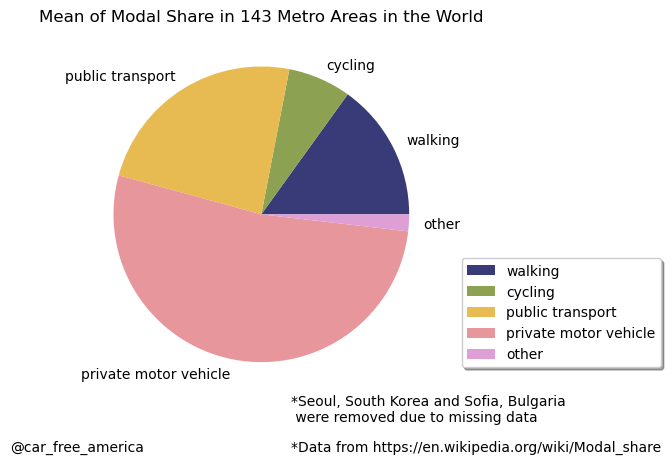

In [14]:
agg_df.plot(kind='pie', colormap='tab20b')
plt.title('Mean of Modal Share in 143 Metro Areas in the World')
plt.legend(bbox_to_anchor=(1.6, 0.4), fancybox=True, shadow=True)
plt.text(0.2, -1.4, '*Seoul, South Korea and Sofia, Bulgaria\n were removed due to missing data')
plt.text(0.2, -1.6, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-1.7, -1.6, '@car_free_america')
plt.plot()

In [15]:
top10_car_df = clean_df.sort_values(by=['private motor vehicle'], ascending=True, axis=0)
top10_car_df.tail(10)

,Metro area,walking,cycling,public transport,private motor vehicle,other,year
58,United States San Diego,3.0,1.0,3.0,85.0,8.0,2016
1,United States Atlanta,1.0,0.0,3.0,86.0,10.0,2016
52,United States Phoenix,2.0,1.0,2.0,87.0,8.0,2016
40,United States Miami,2.0,1.0,4.0,87.0,6.0,2016
57,United States San Antonio,2.0,0.0,3.0,90.0,5.0,2016
19,United States Dallas,1.0,0.0,2.0,90.0,7.0,2016
34,United States Las Vegas,1.0,0.0,4.0,90.0,5.0,2016
31,United States Indianapolis,1.0,0.0,1.0,91.0,7.0,2016
30,United States Houston,1.0,0.0,2.0,91.0,6.0,2016
22,United States Detroit,1.0,0.0,2.0,92.0,5.0,2016


In [16]:
top10_transit_df = clean_df.sort_values(by=['public transport'], ascending=True, axis=0)
top10_transit_df.tail(10)

,Metro area,walking,cycling,public transport,private motor vehicle,other,year
8,Serbia Belgrade,23.000000,1.000000,49.000000,27.000000,0.000000e+00,2015
70,Japan Tokyo,23.000000,14.000000,51.000000,12.000000,0.000000e+00,2008/2009
54,Czech Republic Prague,22.000000,0.400000,52.000000,25.000000,6.000000e-01,2017
44,India Mumbai,27.000000,6.000000,52.000000,15.000000,0.000000e+00,2008/2011
87,Czech Republic Brno,5.000000,2.000000,57.000000,32.000000,4.000000e+00,2012
49,France Paris,15.000000,5.000000,59.000000,20.000000,1.000000e+00,2010
47,Japan Osaka,7.000000,19.000000,61.000000,13.000000,0.000000e+00,2010
42,Belarus Minsk,13.000000,1.000000,63.000000,20.000000,3.000000e+00,2016
12,Colombia Bogota,15.000000,2.000000,64.000000,19.000000,0.000000e+00,2008
29,Hong Kong Hong Kong,10.945274,0.497512,76.616915,11.940299,1.421085e-14,2011


In [17]:
top10_walking_df = clean_df.sort_values(by=['walking'], ascending=True, axis=0)
top10_walking_df.tail(10)

,Metro area,walking,cycling,public transport,private motor vehicle,other,year
144,Switzerland Zürich,33.00,12.00,32.00,21.00,2.000000e+00,2015
80,Switzerland Basel,33.00,17.00,27.00,22.00,1.000000e+00,2015
37,Spain Madrid,34.00,0.50,25.00,40.00,5.000000e-01,2018
98,Germany Düsseldorf,34.00,13.00,18.00,35.00,0.000000e+00,2017
6,Spain Barcelona,34.35,2.28,37.33,26.04,7.105427e-15,2018
61,Chile Santiago,34.50,4.00,29.60,25.70,6.200000e+00,2012
138,Lithuania Vilnius,36.00,0.00,26.00,38.00,0.000000e+00,2011
113,Finland Helsinki,37.00,10.00,30.00,22.00,1.000000e+00,2016
28,Finland Helsinki,39.00,9.00,29.00,22.00,1.000000e+00,2019
143,Spain Zaragoza,45.91,2.90,23.71,26.88,6.000000e-01,2017


In [18]:
top10_cycling_df = clean_df.sort_values(by=['cycling', 'public transport', 'walking'], ascending=True, axis=0)
top10_cycling_df.tail(10)

,Metro area,walking,cycling,public transport,private motor vehicle,other,year
89,Germany Bremen,24.752475,24.752475,14.851485,35.643564,-7.105427e-15,2018
118,Sweden Malmö,6.000000,25.000000,18.000000,51.000000,0.000000e+00,2011
76,Denmark Aarhus,7.000000,27.000000,19.000000,43.000000,4.000000e+00,2004
93,Denmark Copenhagen,9.803922,29.411765,35.294118,25.490196,-1.065814e-14,2012
7,China Beijing,21.000000,32.000000,26.000000,21.000000,0.000000e+00,2005/2011
105,Belgium Gent,12.871287,32.673267,14.851485,39.603960,-7.105427e-15,2018
104,Germany Freiburg im Breisgau,29.000000,34.000000,16.000000,21.000000,0.000000e+00,2017
24,Bangladesh Dhaka,19.000000,39.000000,29.000000,13.000000,0.000000e+00,2009
78,Netherlands Amsterdam,4.000000,40.000000,29.000000,27.000000,0.000000e+00,2014
134,Netherlands Utrecht,25.300000,48.400000,5.400000,18.700000,2.200000e+00,2018


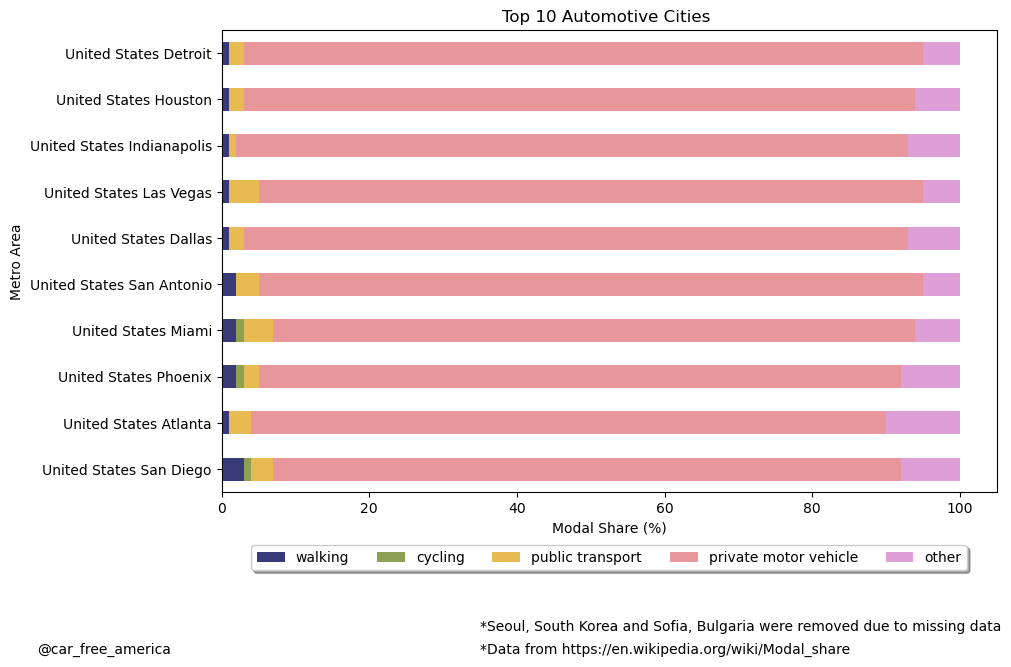

In [19]:
top10_car_df.tail(10).plot(x=0,
        kind='barh',
        stacked=True,
        colormap='tab20b',
        figsize=(10, 6))
plt.title('Top 10 Automotive Cities ', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Metro Area')
plt.xlabel('Modal Share (%)')
plt.text(35, -3.5, '*Seoul, South Korea and Sofia, Bulgaria were removed due to missing data')
plt.text(35, -4, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-25, -4, '@car_free_america')
plt.show()

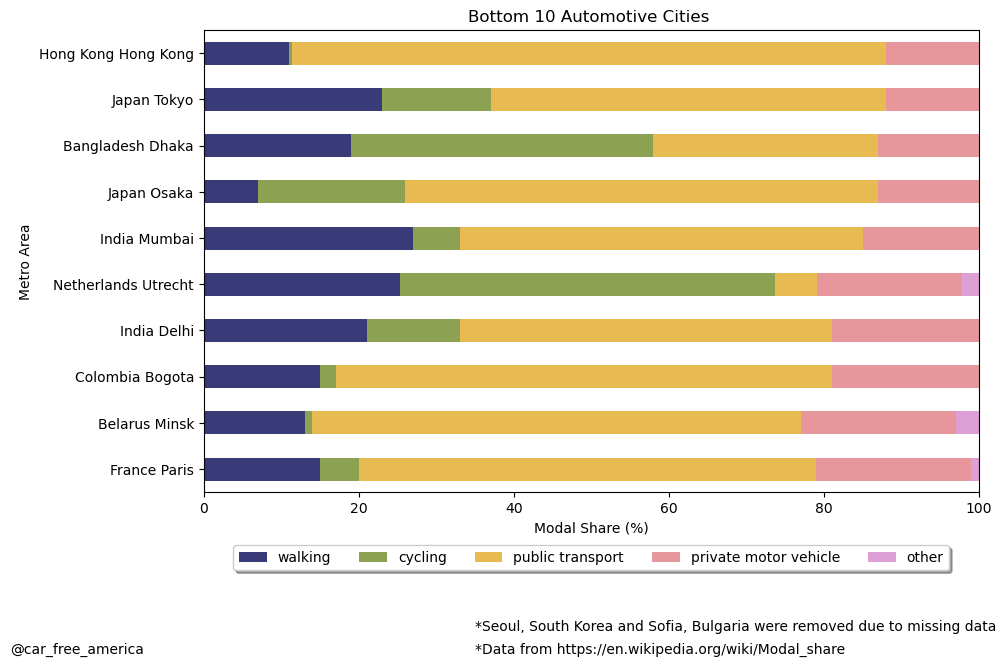

In [20]:
top10_car_df.head(10).loc[::-1].plot(x=0,
        kind='barh',
        stacked=True,
        colormap='tab20b',
        figsize=(10, 6))
plt.title('Bottom 10 Automotive Cities ', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Metro Area')
plt.xlabel('Modal Share (%)')
plt.text(35, -3.5, '*Seoul, South Korea and Sofia, Bulgaria were removed due to missing data')
plt.text(35, -4, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-25, -4, '@car_free_america')
plt.show()

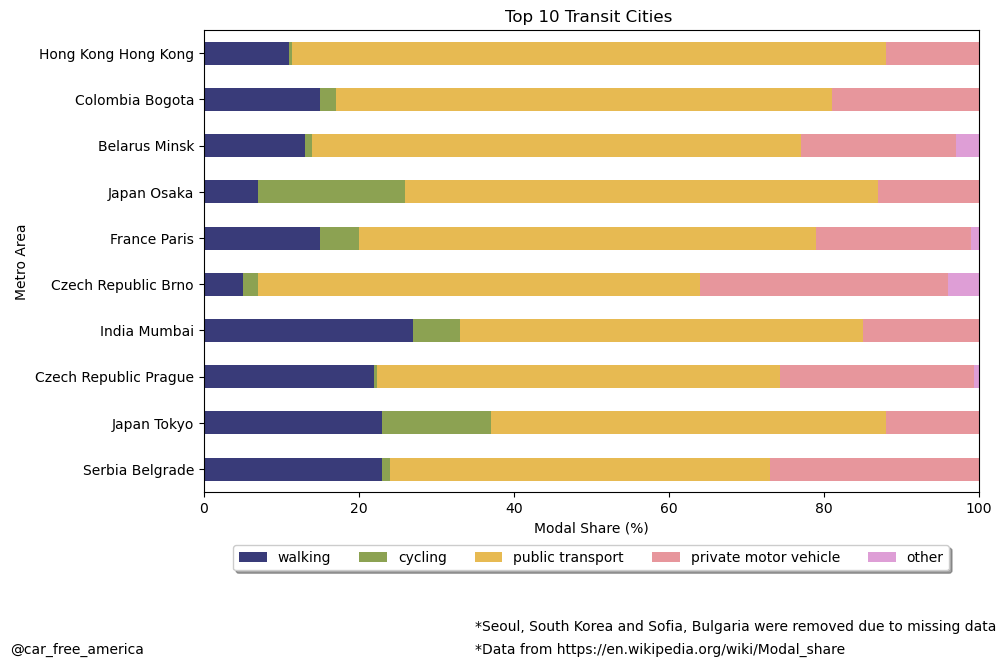

In [21]:
top10_transit_df.tail(10).plot(x=0,
        kind='barh',
        stacked=True,
        colormap='tab20b',
        figsize=(10, 6))
plt.title('Top 10 Transit Cities ', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Metro Area')
plt.xlabel('Modal Share (%)')
plt.text(35, -3.5, '*Seoul, South Korea and Sofia, Bulgaria were removed due to missing data')
plt.text(35, -4, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-25, -4, '@car_free_america')
plt.show()

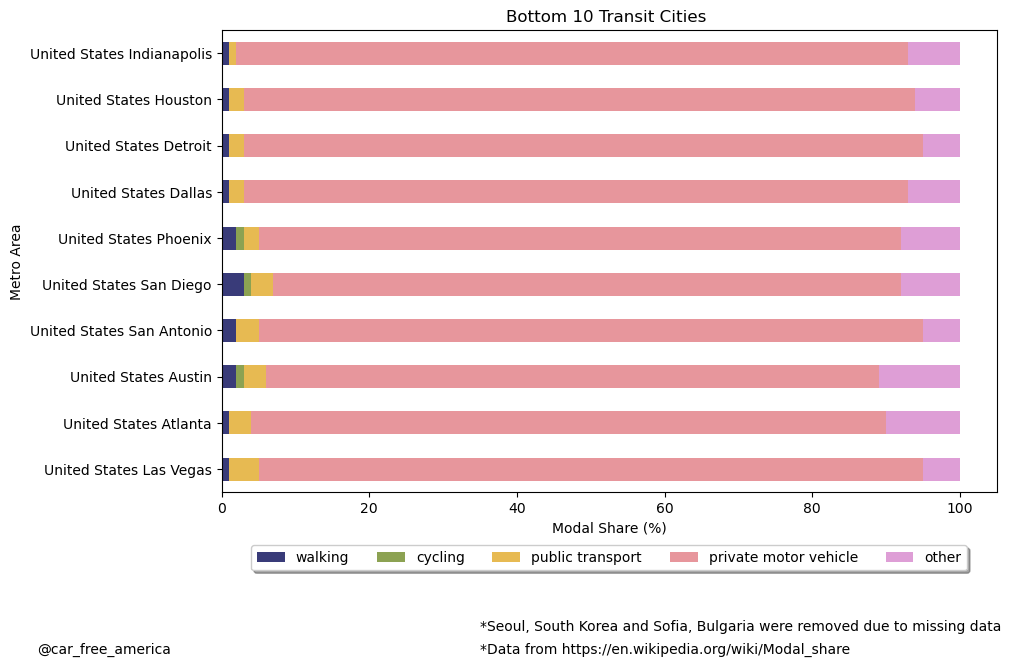

In [22]:
top10_transit_df.head(10).loc[::-1].plot(x=0,
        kind='barh',
        stacked=True,
        colormap='tab20b',
        figsize=(10, 6))
plt.title('Bottom 10 Transit Cities ', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Metro Area')
plt.xlabel('Modal Share (%)')
plt.text(35, -3.5, '*Seoul, South Korea and Sofia, Bulgaria were removed due to missing data')
plt.text(35, -4, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-25, -4, '@car_free_america')
plt.show()

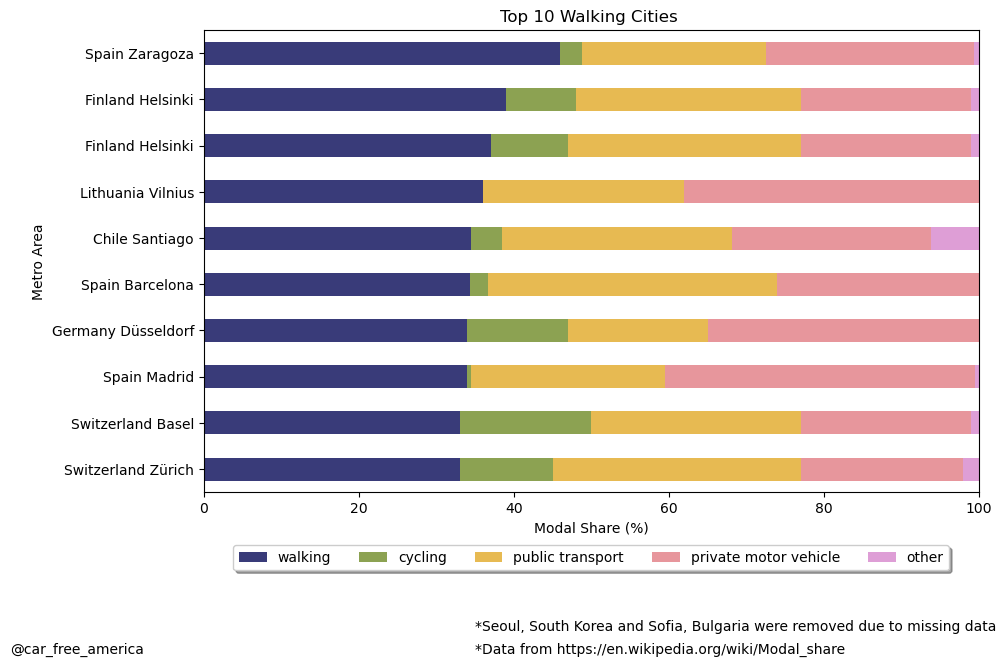

In [23]:
top10_walking_df.tail(10).plot(x=0,
        kind='barh',
        stacked=True,
        colormap='tab20b',
        figsize=(10, 6))
plt.title('Top 10 Walking Cities ', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Metro Area')
plt.xlabel('Modal Share (%)')
plt.text(35, -3.5, '*Seoul, South Korea and Sofia, Bulgaria were removed due to missing data')
plt.text(35, -4, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-25, -4, '@car_free_america')
plt.show()

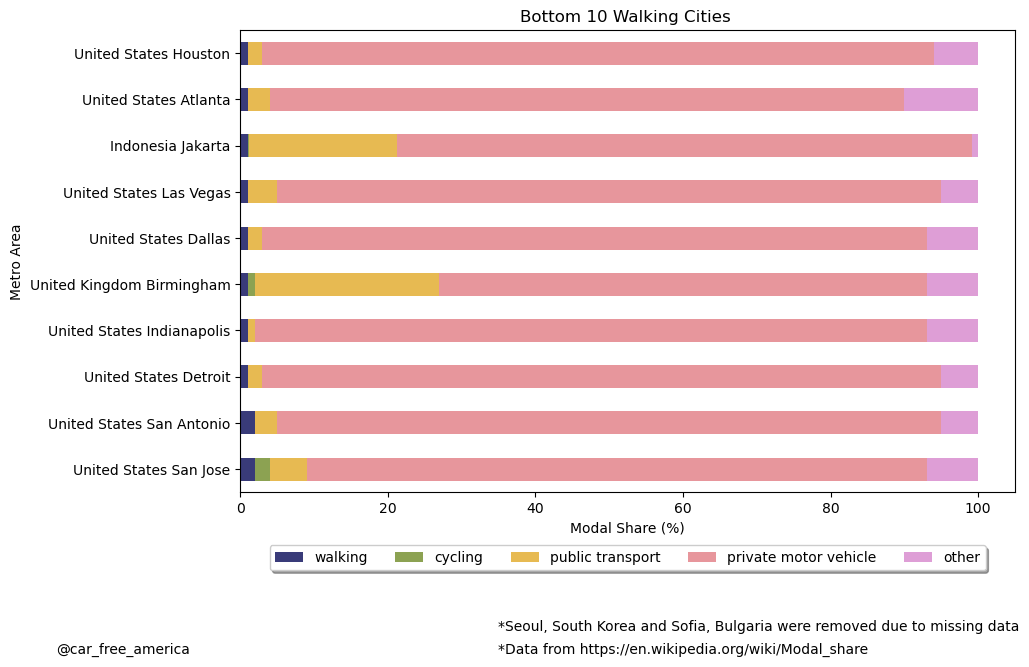

In [24]:
top10_walking_df.head(10).loc[::-1].plot(x=0,
        kind='barh',
        stacked=True,
        colormap='tab20b',
        figsize=(10, 6))
plt.title('Bottom 10 Walking Cities ', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Metro Area')
plt.xlabel('Modal Share (%)')
plt.text(35, -3.5, '*Seoul, South Korea and Sofia, Bulgaria were removed due to missing data')
plt.text(35, -4, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-25, -4, '@car_free_america')
plt.show()

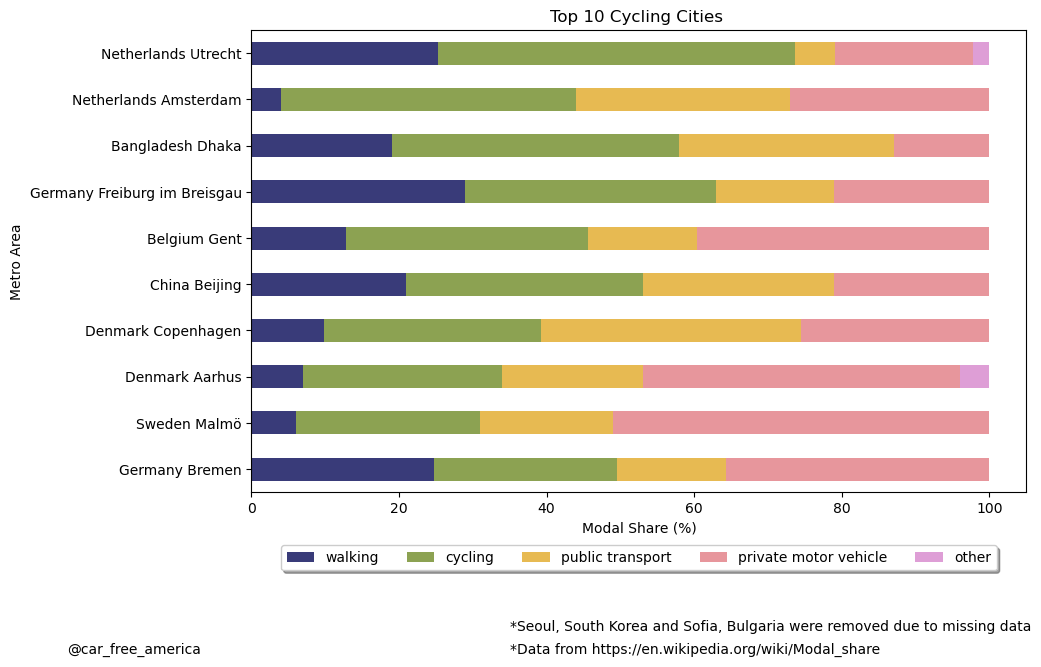

In [25]:
top10_cycling_df.tail(10).plot(x=0,
        kind='barh',
        stacked=True,
        colormap='tab20b',
        figsize=(10, 6))
plt.title('Top 10 Cycling Cities ', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Metro Area')
plt.xlabel('Modal Share (%)')
plt.text(35, -3.5, '*Seoul, South Korea and Sofia, Bulgaria were removed due to missing data')
plt.text(35, -4, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-25, -4, '@car_free_america')
plt.show()

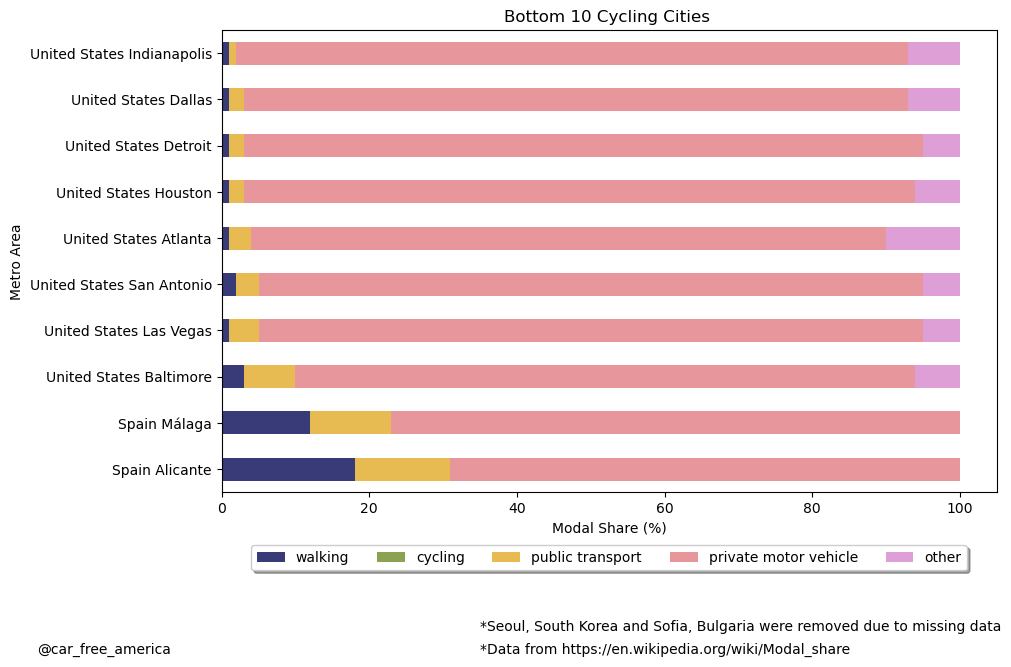

In [26]:
top10_cycling_df.head(10).loc[::-1].plot(x=0,
        kind='barh',
        stacked=True,
        colormap='tab20b',
        figsize=(10, 6))
plt.title('Bottom 10 Cycling Cities ', loc='center')
plt.legend(loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)
plt.ylabel('Metro Area')
plt.xlabel('Modal Share (%)')
plt.text(35, -3.5, '*Seoul, South Korea and Sofia, Bulgaria were removed due to missing data')
plt.text(35, -4, '*Data from https://en.wikipedia.org/wiki/Modal_share')
plt.text(-25, -4, '@car_free_america')
plt.show()